### **Importing the libraries**

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np

### **Loading the dataset**

In [7]:
df = pd.read_csv('imdb_kaggle.csv')
df

,rank,year,duration,age_limit,rating,numberof_ratings,Metascore,description,name
0,1,1994,2h 22m,15,9.3,(2.9M),82.0,"Over the course of several years, two convicts...",The Shawshank Redemption
1,2,1972,2h 55m,15,9.2,(2M),100.0,The aging patriarch of an organized crime dyna...,The Godfather
2,3,2008,2h 32m,12A,9.0,(2.9M),84.0,When the menace known as the Joker wreaks havo...,The Dark Knight
3,4,2003,3h 21m,12A,9.0,(2M),94.0,Gandalf and Aragorn lead the World of Men agai...,The Lord of the Rings: The Return of the King
4,5,1993,3h 15m,15,9.0,(1.5M),95.0,"In German-occupied Poland during World War II,...",Schindler's List
...,...,...,...,...,...,...,...,...,...
995,996,1991,1h 56m,15,7.6,(129K),69.0,A renowned New York playwright is enticed to C...,Barton Fink
996,997,1993,3h 8m,18,7.6,(48K),81.0,The day-to-day lives of several suburban Los A...,Short Cuts
997,998,2007,2h 2m,15,7.6,(69K),78.0,"A profile of Ian Curtis, the enigmatic singer ...",Control
998,999,2013,1h 38m,12A,7.6,(104K),77.0,A world-weary political journalist picks up th...,Philomena


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1000 non-null   int64  
 1   year              1000 non-null   int64  
 2   duration          1000 non-null   object 
 3   age_limit         997 non-null    object 
 4   rating            1000 non-null   float64
 5   numberof_ratings  1000 non-null   object 
 6   Metascore         842 non-null    float64
 7   description       1000 non-null   object 
 8   name              1000 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


### **Dropping the irrelevant columns**

In [9]:
cols = ['name', 'description']
df = df.drop(cols, axis = 1)

### **Finding out the unique values in age_limit column & encoding them**

In [10]:
unique_values = df['age_limit'].unique()
print(unique_values)

['15' '12A' 'U' 'X' 'PG' '18' '12' 'Not Rated' 'AA' 'TV-MA' 'A' '16'
 'PG-13' nan 'Approved' 'R' 'Rejected']


In [11]:
df['age_limit'] = df['age_limit'].astype('category')
df['age_limit'] = df['age_limit'].cat.codes

### **Checking the presence of outliers and replacing them with the threshold values**

In [12]:
def outlierThreshold(df, col, q1 = 0.25, q3 = 0.75):
    quantile1 = df[col].quantile(q1)
    quantile3 = df[col].quantile(q3)
    iqr = quantile3 - quantile1
    low_limit = quantile1 - (1.5 * iqr)
    upper_limit = quantile3 + (1.5 * iqr)
    return low_limit, upper_limit

In [13]:
def replaceWithThreshold(df, col):
    low_limit, upper_limit = outlierThreshold(df, col)
    df.loc[(df[col] < low_limit), col] = low_limit
    df.loc[(df[col] > upper_limit), col] = upper_limit

<Axes: xlabel='Metascore'>

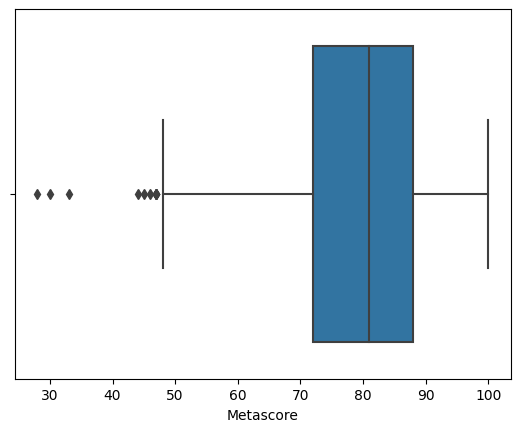

In [14]:
sns.boxplot(x = df['Metascore'])

<Axes: xlabel='Metascore'>

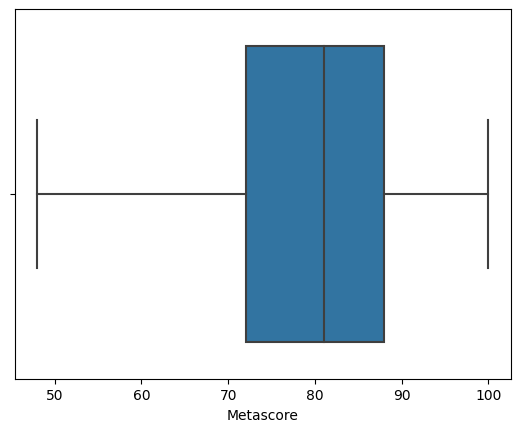

In [15]:
replaceWithThreshold(df, 'Metascore')
sns.boxplot(x = df['Metascore'])

<Axes: xlabel='rating'>

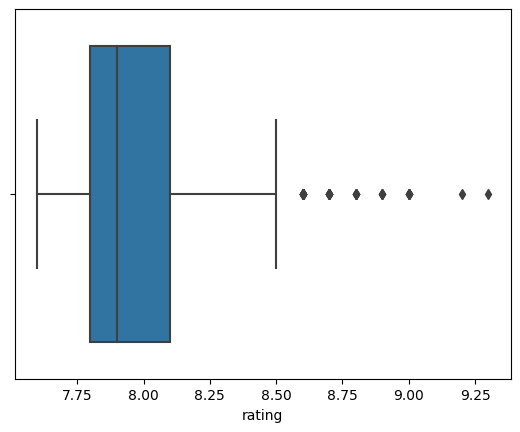

In [16]:
sns.boxplot(x = df['rating'])

<Axes: xlabel='rating'>

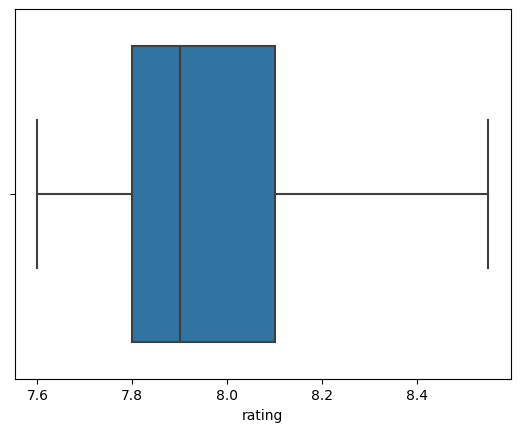

In [17]:
replaceWithThreshold(df, 'rating')
sns.boxplot(x = df['rating'])

### **Converting the duration column to numerical type and transforming them into one unit**

In [18]:
df['duration_in_minutes'] = pd.to_timedelta(df['duration']).dt.total_seconds() / 60
df = df.drop('duration', axis=1)
df

,rank,year,age_limit,rating,numberof_ratings,Metascore,duration_in_minutes
0,1,1994,2,8.55,(2.9M),82.0,142.0
1,2,1972,2,8.55,(2M),100.0,175.0
2,3,2008,1,8.55,(2.9M),84.0,152.0
3,4,2003,1,8.55,(2M),94.0,201.0
4,5,1993,2,8.55,(1.5M),95.0,195.0
...,...,...,...,...,...,...,...
995,996,1991,2,7.60,(129K),69.0,116.0
996,997,1993,4,7.60,(48K),81.0,188.0
997,998,2007,2,7.60,(69K),78.0,122.0
998,999,2013,1,7.60,(104K),77.0,98.0


### **Converting the numberof_ratings column to numerical type**

In [19]:
def convertWithMultiplier(value):
  try:
    num, suffix = value[:-1], value[-1].upper()
    factor = {"K": 1000, "M": 1000000}[suffix]
    return float(num) * factor
  except (ValueError, KeyError):
    return np.nan

In [20]:
# removing the parentheses 
df['numberof_ratings'] = df['numberof_ratings'].str.replace(r"\(|\)", "", regex=True)
df['numberof_ratings'] = df['numberof_ratings'].apply(convertWithMultiplier)

In [21]:
df

,rank,year,age_limit,rating,numberof_ratings,Metascore,duration_in_minutes
0,1,1994,2,8.55,2900000.0,82.0,142.0
1,2,1972,2,8.55,2000000.0,100.0,175.0
2,3,2008,1,8.55,2900000.0,84.0,152.0
3,4,2003,1,8.55,2000000.0,94.0,201.0
4,5,1993,2,8.55,1500000.0,95.0,195.0
...,...,...,...,...,...,...,...
995,996,1991,2,7.60,129000.0,69.0,116.0
996,997,1993,4,7.60,48000.0,81.0,188.0
997,998,2007,2,7.60,69000.0,78.0,122.0
998,999,2013,1,7.60,104000.0,77.0,98.0


### **Checking for outliers in the numberof_ratings column**

<Axes: xlabel='numberof_ratings'>

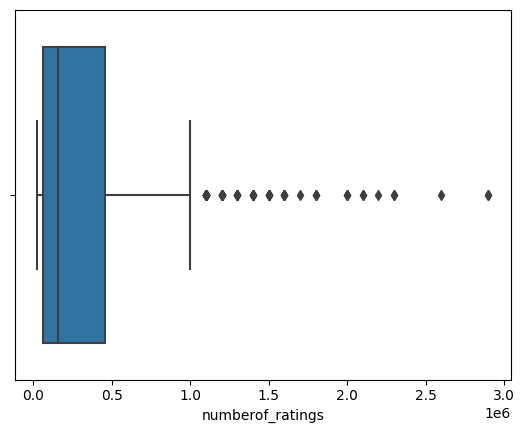

In [23]:
sns.boxplot(x = df['numberof_ratings'])

<Axes: xlabel='numberof_ratings'>

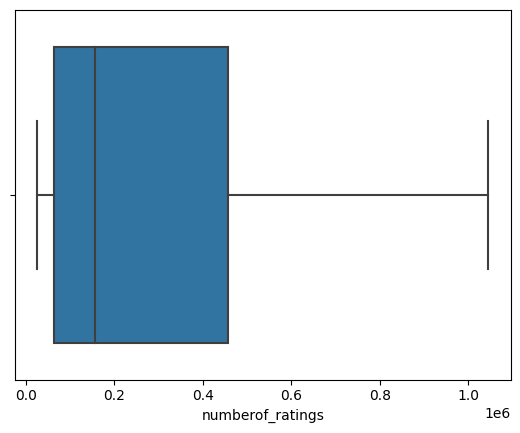

In [24]:
replaceWithThreshold(df, 'numberof_ratings')
sns.boxplot(x = df['numberof_ratings'])

### **Scaling the numberof_ratings column**

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))
df['numberof_ratings_scaled'] = scaler.fit_transform(df[['numberof_ratings']])
df = df.drop('numberof_ratings', axis = 1)
df

,rank,year,age_limit,rating,Metascore,duration_in_minutes,numberof_ratings_scaled
0,1,1994,2,8.55,82.0,142.0,10.000000
1,2,1972,2,8.55,100.0,175.0,10.000000
2,3,2008,1,8.55,84.0,152.0,10.000000
3,4,2003,1,8.55,94.0,201.0,10.000000
4,5,1993,2,8.55,95.0,195.0,10.000000
...,...,...,...,...,...,...,...
995,996,1991,2,7.60,69.0,116.0,1.010547
996,997,1993,4,7.60,81.0,188.0,0.215845
997,998,2007,2,7.60,78.0,122.0,0.421879
998,999,2013,1,7.60,77.0,98.0,0.765269


### **Checking for missing values**

In [26]:
df.isnull().sum()

rank                         0
year                         0
age_limit                    0
rating                       0
Metascore                  158
duration_in_minutes          0
numberof_ratings_scaled      0
dtype: int64

### **Filling the missing records with interpolation**

In [27]:
df['Metascore'] = df['Metascore'].interpolate()

In [28]:
df.isnull().sum()

rank                       0
year                       0
age_limit                  0
rating                     0
Metascore                  0
duration_in_minutes        0
numberof_ratings_scaled    0
dtype: int64